In [1]:
# Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Reading in the Database

df = pd.read_csv('diabetes_clean.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Sanity Check - Correlating Column names and Indicies

# Get the column names and their corresponding indices
column_info = [(index, column_name) for index, column_name in enumerate(df.columns)]

# Print the results
for index, column_name in column_info:
    print(f"Index {index}: Column Name '{column_name}'")

Index 0: Column Name 'Diabetes_012'
Index 1: Column Name 'HighBP'
Index 2: Column Name 'HighChol'
Index 3: Column Name 'CholCheck'
Index 4: Column Name 'BMI'
Index 5: Column Name 'Smoker'
Index 6: Column Name 'Stroke'
Index 7: Column Name 'HeartDiseaseorAttack'
Index 8: Column Name 'PhysActivity'
Index 9: Column Name 'Fruits'
Index 10: Column Name 'Veggies'
Index 11: Column Name 'HvyAlcoholConsump'
Index 12: Column Name 'AnyHealthcare'
Index 13: Column Name 'NoDocbcCost'
Index 14: Column Name 'GenHlth'
Index 15: Column Name 'MentHlth'
Index 16: Column Name 'PhysHlth'
Index 17: Column Name 'DiffWalk'
Index 18: Column Name 'Sex'
Index 19: Column Name 'Age'
Index 20: Column Name 'Education'
Index 21: Column Name 'Income'


In [4]:
# Beginning PCA for Feature Importance Ranking:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separating the Target Variable from the rest of the features
X = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"]

# Splitting the Data Into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=0)

# Standardizing the data
standardize = StandardScaler()
X_train_std = standardize.fit_transform(X_train)
X_test_std = standardize.transform(X_test)

 1) BMI                            0.182868
 2) Age                            0.122038
 3) Income                         0.098395
 4) PhysHlth                       0.083641
 5) Education                      0.070614
 6) GenHlth                        0.069235
 7) MentHlth                       0.065199
 8) HighBP                         0.041003
 9) Smoker                         0.034072
10) Fruits                         0.033652
11) Sex                            0.029263
12) Veggies                        0.026756
13) HighChol                       0.026330
14) PhysActivity                   0.025897
15) DiffWalk                       0.023499
16) HeartDiseaseorAttack           0.018422
17) NoDocbcCost                    0.015423
18) Stroke                         0.012507
19) AnyHealthcare                  0.009144
20) HvyAlcoholConsump              0.008267
21) CholCheck                      0.003774


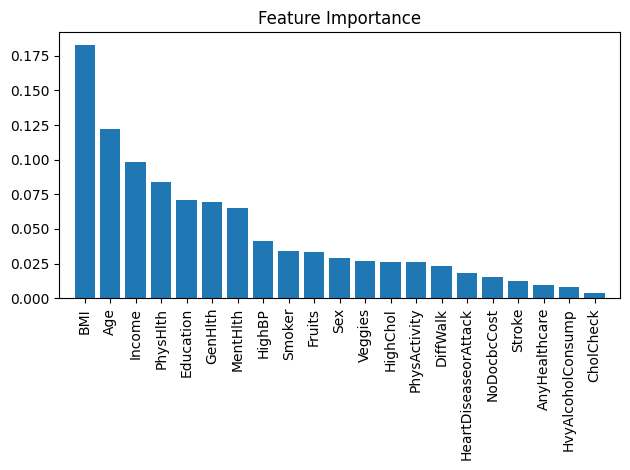

In [5]:
# Random Forest Feature Importance:

from sklearn.ensemble import RandomForestClassifier
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[:: -1]
for f in range(X_train.shape[1]):
    print("%2d) % -*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

With this information we can see that the top ten features (ranked by imporance) account for ~79% of importance when it comes to diabetes diagnosis

The top 5 features account for ~55.5% of importance while the top 2 features account for ~30% of importance when it comes to diabetes diagnosis

The top 10 features are as follows:
1) BMI
2) Age
3) Income
4) PhysHlth
5) Education
6) GenHlth
7) MentHlth
8) HighBP
9) Smoker
10) Fruits

In [6]:
# Evaluating Performance Based on Number of Features = 10

ten_features = ["BMI", "Age", "Income", "PhysHlth", "Education", "GenHlth", "MentHlth", "HighBP", "Smoker", "Fruits"]

# Reset DataFrame 'X' containing only the selected features
X = df[ten_features]

# Splitting the Data Into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=0)

# Standardizing the data
standardize = StandardScaler()
X_train_std = standardize.fit_transform(X_train)
X_test_std = standardize.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the model on the training data
clf.fit(X_train_std, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_std)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8295490381583097


In [7]:
# Evaluating Performance Based on Number of Features = 5

five_features = ["BMI", "Age", "Income", "PhysHlth", "Education"]

# Reset DataFrame 'X' containing only the selected features
X = df[five_features]

# Splitting the Data Into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=0)

# Standardizing the data
standardize = StandardScaler()
X_train_std = standardize.fit_transform(X_train)
X_test_std = standardize.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the model on the training data
clf.fit(X_train_std, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_std)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8238857353095763


In [8]:
# Evaluating Performance Based on Number of Features = 2

two_features = ["BMI", "Age"]

# Reset DataFrame 'X' containing only the selected features
X = df[two_features]

# Splitting the Data Into Train and Test:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=0)

# Standardizing the data
standardize = StandardScaler()
X_train_std = standardize.fit_transform(X_train)
X_test_std = standardize.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the model on the training data
clf.fit(X_train_std, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_std)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8419793966151582


[[63761     2   348]
 [ 1371     0    18]
 [10287     0   317]]


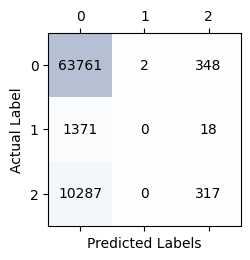

In [9]:
# Confusion Matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(confmat)

fig, ax = plt.subplots(figsize=(2.5,2.5))

ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Label')
plt.show()

The Random Forest Classifier Performed Pretty well with results summarized as follows:
- Using 10 Features for Classification = 82.9% Accuracy
- Using 5 Features for Classification = 82.3% Accuracy
- Using 2 Features for Classification = 84.1% Accuracy

To answer the questions found in README.txt:

1) Survey questions can provide accurate predictions of an individual's diabetes diagnosis.
2) The ten most predictive risk factors for diabetes are as follows, ranked in most predictive to least predictive order: BMI, Age, Income, PhysHlth, Education, GenHlth, MentHlth, HighBP, Smoker, Fruits.
3) We can use a subset of the questions to make an accurate prediction of an individual's diabetes risk factors.
4) Yes there is a short form of the risk factor questions that we may ask individuals to predict their diabetic status. The short form is as follows: BMI, Age, Income, PhysHlth, Education (largely socio-economic factors interestingly enough)